In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [2]:
# choose monk dataset
monk = str(1)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
train_patterns, test_patterns = decode_patterns(encoding, features, train_data, test_data)
train_labels, test_labels = transform_labels(train_data, test_data)

## SGD

### SGD - define network and parameters

In [13]:
# define architecture and hyperparameters
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
network = Network(architecture, neurons)
loss_object = SquaredError("tangentH")
learning_rate = 0.01
momentum = 0.95
regularization = 0#0.01
batch_size = 16
epsilon = 1e-5
epochs = 50

### SGD - train

In [14]:
tic = time()
# 5. train
loss_tr_sgd, mis_tr_sgd, \
loss_ts_sgd, mis_ts_sgd, norm_gradients_sgd = network.train_SGD(x_train=train_patterns, 
                                         y_train=train_labels, 
                                         x_test=test_patterns,
                                         y_test=test_labels,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=regularization,
                                        epsilon=epsilon)
toc = time()

### SGD - training curves

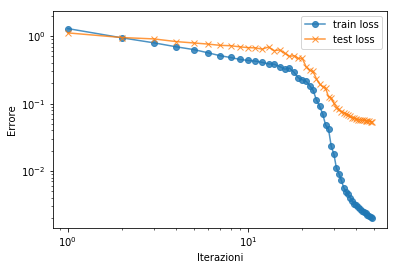

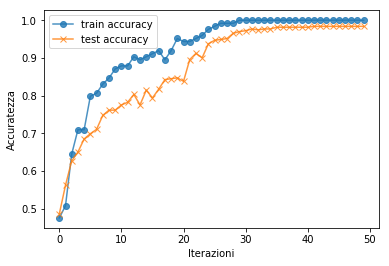

accuracy train: 1.0
accuracy test: 0.983796296296
error train: 0.00200399282623
error test: 0.0535925647069
time: 10.3108561039
norm gradient last: 0.181610595551


In [15]:
plot_train_test_learning_curve(loss_ts_sgd, loss_tr_sgd, mis_ts_sgd, mis_tr_sgd)
print "accuracy train:", 1 - mis_tr_sgd[-1]
print "accuracy test:", 1 - mis_ts_sgd[-1]
print "error train:", loss_tr_sgd[-1]
print "error test:", loss_ts_sgd[-1]
print "time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]

## BFGS

### BFGS - define network and parameters

In [4]:
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0#1e-2
epsilon = 1e-5
epochs = 100

network = Network(architecture, neurons)

### BFGS - train

In [5]:
tic = time()
loss_tr_bfgs, mis_tr_bfgs, loss_ts_bfgs, mis_ts_bfgs, \
alphas_bfgs, norm_gradients_bfgs, \
cond_bfgs = network.train_BFGS(train_patterns, train_labels, 
                                                       test_patterns, test_labels,
                                                       theta=theta, c_1=c_1, c_2=c_2, 
                                                       lossObject=loss_object, 
                                                       regularization=lambda_, 
                                                       epochs=epochs, epsilon=epsilon,
                                                       line_search='backtracking')
toc = time()

0 out of 100
1 out of 100
2 out of 100
3 out of 100
4 out of 100
5 out of 100
6 out of 100
7 out of 100
8 out of 100
9 out of 100
10 out of 100
11 out of 100
12 out of 100
13 out of 100
14 out of 100
15 out of 100
16 out of 100
17 out of 100
18 out of 100
19 out of 100
20 out of 100
21 out of 100
22 out of 100
23 out of 100
24 out of 100
25 out of 100
26 out of 100
27 out of 100
28 out of 100
29 out of 100
30 out of 100
31 out of 100
32 out of 100
33 out of 100
34 out of 100
35 out of 100
36 out of 100
37 out of 100
38 out of 100
39 out of 100
40 out of 100
41 out of 100
42 out of 100
43 out of 100
44 out of 100
45 out of 100
46 out of 100
47 out of 100
stop: gradient norm, epoch 47


### BFGS - training curves

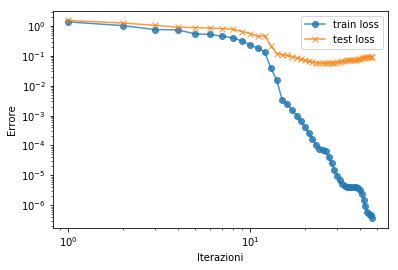

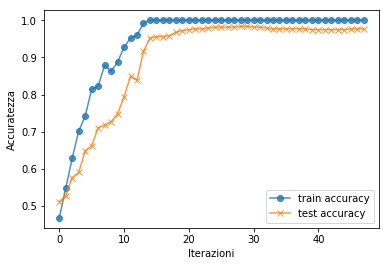

accuracy train: 1.0
accuracy test: 0.976851851852
loss train: 3.6871149487e-07
loss test: 0.091737758795
training time: 20.1515529156
norm gradient last: 8.09133436583e-06


In [6]:
plot_train_test_learning_curve(loss_ts_bfgs, loss_tr_bfgs, mis_ts_bfgs, mis_tr_bfgs)
print "accuracy train:", 1 - mis_tr_bfgs[-1]
print "accuracy test:", 1 - mis_ts_bfgs[-1]
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]

# L- BFGS

### L-BFGS - define network and parameters

In [7]:
architecture = [17, 20, 10, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.9
theta = 0.7
lambda_ = 0.0#0.01
epsilon = 1e-5
epochs = 100
m = 5

network = Network(architecture, neurons)

### L-BFGS - train

In [8]:
tic = time()
loss_tr_lbfgs, mis_tr_lbfgs, loss_ts_lbfgs, \
mis_ts_lbfgs, alphas_lbfgs, norm_gradients_lbfgs, \
cond_lbfgs = network.train_LBFGS(train_patterns, train_labels,
                                 test_patterns, test_labels,
                                 theta=theta, c_1=c_1, c_2=c_2, 
                                 lossObject=loss_object,
                                 regularization=lambda_, 
                                 epochs=epochs, epsilon=epsilon, m=m, 
                                 line_search='backtracking')
toc = time()

0 out of 100
1 out of 100
2 out of 100
3 out of 100
4 out of 100
5 out of 100
6 out of 100
7 out of 100
8 out of 100
9 out of 100
10 out of 100
11 out of 100
12 out of 100
13 out of 100
14 out of 100
15 out of 100
16 out of 100
17 out of 100
18 out of 100
19 out of 100
20 out of 100
21 out of 100
22 out of 100
23 out of 100
24 out of 100
25 out of 100
26 out of 100
27 out of 100
28 out of 100
29 out of 100
30 out of 100
31 out of 100
32 out of 100
33 out of 100
stop: norm gradient, epoch 33


### L-BFGS - training curves

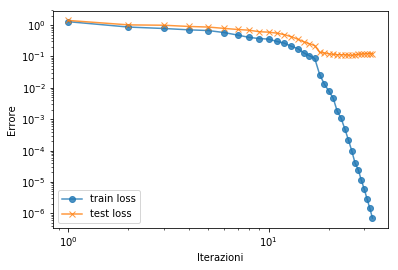

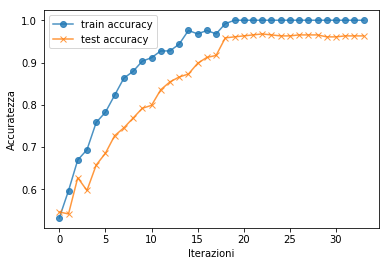

accuracy train: 1.0
accuracy test: 0.962962962963
loss train: 7.01403249957e-07
loss test: 0.121348565147
training time: 12.1910390854
norm gradient last: 6.50799991984e-06


In [10]:
plot_train_test_learning_curve(loss_ts_lbfgs, loss_tr_lbfgs, mis_ts_lbfgs, mis_tr_lbfgs)
print "accuracy train:", 1 - mis_tr_lbfgs[-1]
print "accuracy test:", 1 - mis_ts_lbfgs[-1]
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1]
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]

## Optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)
- condition number of H vs iterations

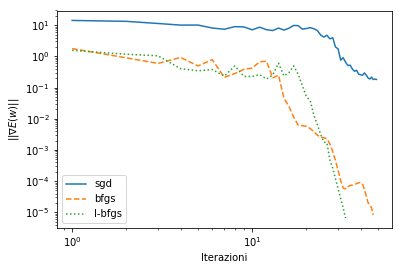

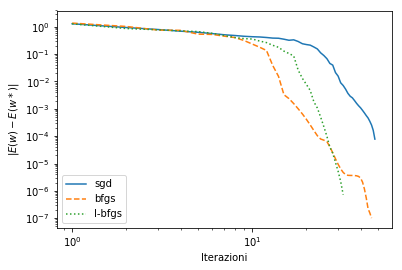

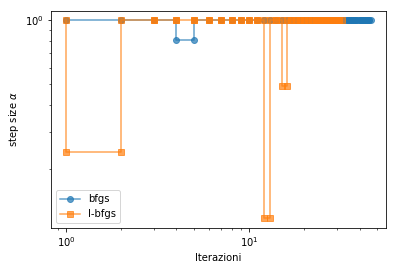

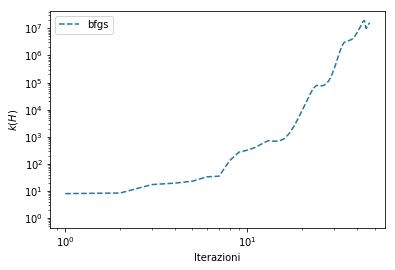

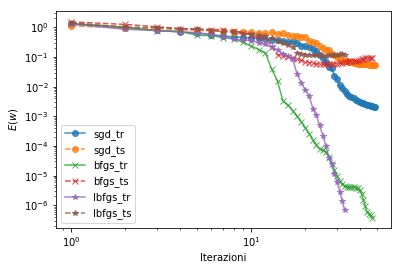

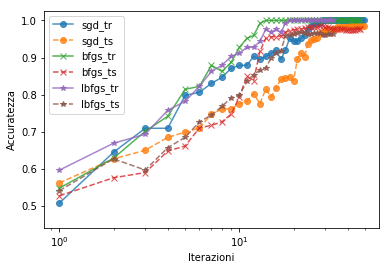

In [17]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)
plot_all_loss(loss_tr_sgd, loss_ts_sgd, loss_tr_bfgs, loss_ts_bfgs, loss_tr_lbfgs, loss_ts_lbfgs,\
             xscale='log', yscale='log')
plot_all_accuracy(mis_tr_sgd, mis_ts_sgd, mis_tr_bfgs, mis_ts_bfgs, mis_tr_lbfgs, mis_ts_lbfgs, \
                  xscale='log')